# Global Configurations

# Initialization

In [1]:
#######################
# HOME_DIR 경로 설정  #
#######################
HOME_DIR = '/home/swlab/work/NNV/data/' # 'D:/Work/Research/AI/wireless/' # 'M:/Archive/Google Drive/'   

SOURCE_CODE_DIR = HOME_DIR + '' # 'Archive/Source Codes/Jupyter/Antenna Selection Exp02/'

####################################################
# Pickle 폴더에 별도 제공된 피클 데이터 파일 복사  #
####################################################
DB_DIR = SOURCE_CODE_DIR + 'Pickle/' # 'C:\Digital Data\Data/'

LOG_DIR = SOURCE_CODE_DIR + 'Logs/'
MODEL_DIR = SOURCE_CODE_DIR + 'Models/'
WEIGHT_DIR = SOURCE_CODE_DIR + 'Weights/'
HISTORY_DIR = SOURCE_CODE_DIR + 'History/'

PYTORCHMODEL_DIR = SOURCE_CODE_DIR + 'PytorchModels/'

DATA_USING = 'H'
LABEL_TYPE = 'hard'
CASE_TYPE = 'short'
INPUT_SHAPE = 'HTH-1D'

ADDITIONAL_STRING = ' mMIMO FC ' + DATA_USING + ' ' + LABEL_TYPE + ' ' + CASE_TYPE

##### Set of Experiments (ONLY for FULLY-CONNECTED NETWORK)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import pickle
import os
import datetime
import time

# Data Loading


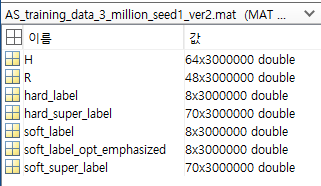

## Load Input File from pickle

## Assign Train and Test Data

In [3]:
file_name_head = "mMIMO_AS_training_data_20000_80_"
file_name_tail = ".pickle"

pickle_H_HTH_ORG_1D = file_name_head + "H_HTH_ORG_1D" + file_name_tail
pickle_labelVal = file_name_head + "labelVal" + file_name_tail
pickle_labelVal01 = file_name_head + "labelVal01" + file_name_tail

pickle_dir_data = DB_DIR + pickle_H_HTH_ORG_1D
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    H_inputVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal01
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal01_all = pickle.load(f)

/home/swlab/work/NNV/data/Pickle/mMIMO_AS_training_data_20000_80_H_HTH_ORG_1D.pickle
/home/swlab/work/NNV/data/Pickle/mMIMO_AS_training_data_20000_80_labelVal.pickle
/home/swlab/work/NNV/data/Pickle/mMIMO_AS_training_data_20000_80_labelVal01.pickle


In [4]:
numberOfAntenna = 16

no_dataInFile = 20000

############# Training DATA

no_testDataFiles = 78
no_totalData = no_dataInFile * (no_testDataFiles)

if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    inputVal = R_inputVal_all[:no_totalData,:]
elif DATA_USING == 'H':
    inputSize = numberOfAntenna * numberOfAntenna
    inputVal = H_inputVal_all[:no_totalData,:]

labelVal = labelVal_all[:no_totalData,:]
labelVal01 = labelVal01_all[:no_totalData,:]

############# Test DATA

no_valDataFiles = 2
no_totalValData = no_dataInFile * no_valDataFiles


if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    testInputVal = R_inputVal_all[no_totalData:,:]
elif DATA_USING == 'H':
    inputSize = numberOfAntenna * numberOfAntenna
    testInputVal = H_inputVal_all[no_totalData:,:]

if INPUT_SHAPE == 'H-ARI-1D':
    inputSize = 384
    
testLabelVal = labelVal_all[no_totalData:,:]
testLabelVal01 = labelVal01_all[no_totalData:,:]

In [5]:
print(no_totalData)
print(no_totalValData)

if DATA_USING == 'R':
    print(R_inputVal_all.shape)
elif DATA_USING == 'H':
    print(H_inputVal_all.shape)
print(labelVal_all.shape)
print(labelVal01_all.shape)

print('====== INPUT(' + DATA_USING + ') : ' + str(inputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== LABEL : ' + str(labelVal.shape))
print(labelVal)
print('====== LABEL01 : ' + str(labelVal01.shape))
print(labelVal01)

print('================================================')

print('====== TEST INPUT(' + DATA_USING + ') : ' + str(testInputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== TEST LABEL : ' + str(testLabelVal.shape))
print(testLabelVal)
print('====== TEST LABEL01 : ' + str(testLabelVal01.shape))
print(testLabelVal01)

1560000
40000
(1600000, 256)
(1600000, 16)
(1600000, 16)
====== INPUT(H) : (1560000, 256) 256
[[0.43508627 0.23848953 0.17430991 ... 0.1494573  0.30463561 0.75840547]
 [0.91201586 0.14239275 0.35888622 ... 0.19680358 0.33829332 0.82588916]
 [0.38958044 0.19529653 0.12486362 ... 0.25814239 0.1255808  0.33462105]
 ...
 [0.2864378  0.2310919  0.14119503 ... 0.06365318 0.0519114  0.33934222]
 [0.92569351 0.22256976 0.21577545 ... 0.28583585 0.17893457 0.73793588]
 [0.57095904 0.11634311 0.03737261 ... 0.03271034 0.02874345 0.48409718]]
====== LABEL : (1560000, 16)
[[0.04384313 0.05183032 0.07402939 ... 0.07402939 0.05051586 0.07402939]
 [0.04217359 0.02302756 0.0729369  ... 0.07109003 0.0729369  0.0729369 ]
 [0.06612287 0.07401018 0.05073263 ... 0.07401018 0.07401018 0.02408138]
 ...
 [0.0699337  0.04693798 0.06201793 ... 0.0699337  0.0699337  0.04982493]
 [0.08032117 0.08032117 0.08032117 ... 0.08032117 0.04618059 0.08032117]
 [0.07990972 0.02283044 0.07990972 ... 0.07990972 0.02191744 0.

In [5]:
!pip install torch

DEPRECATION: Loading egg at /home/swlab/.local/lib/python3.11/site-packages/octopus_tools-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


## Prepare for Data and Metrics 

## Model Setting

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

class WirelessModel (nn.Module):
    def __init__(self, numberOfAntenna):
        super(WirelessModel, self).__init__()

        # layer 1
        self.layer1 = nn.Linear(numberOfAntenna*numberOfAntenna, 491, bias=False)    # numberOfAntenna*numberOfAntenna = 256
        self.bn1 = nn.BatchNorm1d(491)

        # layer 2
        self.layer2 = nn.Linear(491, 491, bias=False)
        self.bn2 = nn.BatchNorm1d(491)

        # layer 3
        self.layer3 = nn.Linear(491, numberOfAntenna, bias=False)     # numberOfAntenna = 16
        self.bn3 = nn.BatchNorm1d(numberOfAntenna)

        nn.init.kaiming_normal_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_normal_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_normal_(self.layer3.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        # layer 1
        x = self.layer1(x)
        x = self.bn1(x)
        x = F.relu(x)

        # layer 2
        x = self.layer2(x)
        x = self.bn2(x)
        x = F.relu(x)

        # layer 3
        x = self.layer3(x)
        x = self.bn3(x)
        x = torch.sigmoid(x)

        return x

wirelessModel = WirelessModel(16)

wirelessModel.to(device)
print(wirelessModel)

ModuleNotFoundError: No module named 'torch'

In [7]:
!pip install torchsummary

from torchsummary import summary
summary(wirelessModel, (numberOfAntenna * numberOfAntenna,))

DEPRECATION: Loading egg at /home/swlab/.local/lib/python3.11/site-packages/octopus_tools-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached torchsummary-1.5.1-py3-none-any.whl.metadata (296 bytes)
Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)


ModuleNotFoundError: No module named 'torchsummary'

In [6]:
# 
train_X_all = torch.tensor(inputVal, dtype=torch.float32)
train_Y_all = torch.tensor(labelVal, dtype=torch.float32)
train_Y_01_all = torch.tensor(labelVal01, dtype=torch.float32)

test_X_all = torch.tensor(testInputVal, dtype=torch.float32)
test_Y_all = torch.tensor(testLabelVal, dtype=torch.float32)
test_Y_01_all = torch.tensor(testLabelVal01, dtype=torch.float32)

# for indenendent validation
from sklearn.model_selection import train_test_split

train_X = train_X_all
train_Y = train_Y_01_all

test_X = test_X_all
test_Y = test_Y_01_all

print('Train : Test = ' + str(train_X.shape[0]) + ' : ' + str(test_X.shape[0]))

NameError: name 'torch' is not defined

## Learning Fully-Connected

### Learning

In [11]:
# after setting train_X_all, train_Y_all, and so on

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import LambdaLR
from sklearn.metrics import accuracy_score, precision_score

train_dataset = TensorDataset(train_X, train_Y)
train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

test_dataset = TensorDataset(test_X, test_Y)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

def piecewise_scheduler_fn(epoch):
    if epoch < 10:
        return 0.005
    elif epoch < 15:
        return 0.0005
    elif epoch < 20:
        return 0.00005
    else:
        return 0.000005

criterion = nn.BCELoss()
optimizer = optim.Adam(wirelessModel.parameters(), lr=0.01)
scheduler = LambdaLR(optimizer, lr_lambda=piecewise_scheduler_fn)

# 훈련
num_epochs = 25
history = {'loss': [], 'accuracy': [], 'precision': []}

for epoch in range(num_epochs):
    wirelessModel.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = wirelessModel(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    scheduler.step()
    history['loss'].append(running_loss / len(train_loader))
    
    # 검증
    wirelessModel.eval()
    all_preds = []
    all_preds_raw = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = wirelessModel(inputs)
            #preds = outputs.round()
            preds = torch.round(outputs)
            all_preds.append(preds)
            all_preds_raw.append(outputs)
            all_labels.append(labels)
    
    all_preds = torch.cat(all_preds)
    all_preds_raw = torch.cat(all_preds_raw)
    all_labels = torch.cat(all_labels)
    test_acc = accuracy_score(all_labels, all_preds)
    test_precision = precision_score(all_labels, all_preds, average='macro') # 평균 옵션은 필요에 따라 조정
    
    history['accuracy'].append(test_acc)
    history['precision'].append(test_precision)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Accuracy: {test_acc}, Precision: {test_precision}")

# 최종 평가
wirelessModel.eval()
all_preds = []
all_preds_raw = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = wirelessModel(inputs)
        # preds = outputs.round()
        preds = torch.round(outputs)
        all_preds.append(preds)
        all_preds_raw.append(outputs)
        all_labels.append(labels)

all_preds = torch.cat(all_preds)
all_preds_raw = torch.cat(all_preds_raw)
all_labels = torch.cat(all_labels)
test_loss = criterion(all_preds, all_labels).item()
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro')

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}")


Epoch 1/25, Loss: 0.4626565806567669, Accuracy: 0.016725, Precision: 0.773238104684129
Epoch 2/25, Loss: 0.4608637047883792, Accuracy: 0.017075, Precision: 0.7738923816139526
Epoch 3/25, Loss: 0.45941568550008993, Accuracy: 0.017275, Precision: 0.774408679344455
Epoch 4/25, Loss: 0.45822325729024715, Accuracy: 0.01705, Precision: 0.7750358458862912
Epoch 5/25, Loss: 0.45720059655797785, Accuracy: 0.01725, Precision: 0.7754476614317878
Epoch 6/25, Loss: 0.45629968547668215, Accuracy: 0.01745, Precision: 0.7758834762607447
Epoch 7/25, Loss: 0.4554977907966345, Accuracy: 0.01705, Precision: 0.7764579744675545
Epoch 8/25, Loss: 0.4547603972065143, Accuracy: 0.017325, Precision: 0.7764098171172877
Epoch 9/25, Loss: 0.4540860298352364, Accuracy: 0.017025, Precision: 0.7767835947507646
Epoch 10/25, Loss: 0.4534698839371021, Accuracy: 0.0175, Precision: 0.7769128835789676
Epoch 11/25, Loss: 0.4525575139583686, Accuracy: 0.017625, Precision: 0.7771560578618
Epoch 12/25, Loss: 0.4524348025711683

In [14]:
torch.save(wirelessModel.state_dict(), PYTORCHMODEL_DIR + 'wirelessmodel.pt')

In [13]:
######################################
# auto_LiRPA를 git으로 1회 내려받기  #
######################################

!git clone https://github.com/Verified-Intelligence/auto_LiRPA




Cloning into 'auto_LiRPA'...
remote: Enumerating objects: 907, done.
remote: Counting objects: 100% (536/536), done.
remote: Compressing objects: 100% (264/264), done.
remote: Total 907 (delta 318), reused 448 (delta 265), pack-reused 371 (from 1)
Receiving objects: 100% (907/907), 33.30 MiB | 7.72 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [15]:
#########################################################
# auto_LiRPA/setup.py 인코딩 문제를 해결하기 위해 편집  #
#########################################################
# EDIT setup.py as explained in https://github.com/kwanghoon/NNV/blob/main/liRPA-Guide.md
#
#   - with open('auto_LiRPA/__init__.py') as file:
#   => with open('auto_LiRPA/__init__.py', encoding="utf-8") as file:
#
#   - long_description = (this_directory / 'README.md').read_text()
#   => long_description = (this_directory / 'README.md').read_text(encoding='utf8')

In [16]:
!pip install ./auto_LiRPA

Processing ./auto_LiRPA
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 7.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 7.1 MB/s eta 0:00:00m eta 0:00:010:01:01
  Created wheel for auto_LiRPA: filename=auto_LiRPA-0.5.0-py3-none-any.whl size=240071 sha256=f3ed3a10b7af97043edff9cde3d0019c95236448ab1daf2c42ad90ccacf3a558
  Stored in directory: /tmp/pip-ephem-wheel-cache-gw2u91tt/wheels/b4/97/84/f64ea8bae2b979a3d5f1342f1ae93138415ce83fc7957f686e
Successfully built auto_LiRPA
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.20.5
    Uninstalling nvidia-nccl-

In [8]:
from auto_LiRPA import BoundedModule, BoundedTensor
from auto_LiRPA.perturbations import PerturbationLpNorm
from auto_LiRPA.utils import Flatten
from collections import defaultdict

In [12]:
model = wirelessModel
# Optionally, load the pretrained weights.
checkpoint = torch.load(
    PYTORCHMODEL_DIR + 'wirelessmodel.pt',
    map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [11]:
!pip install onnx2pytorch

/home/swlab/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=5267) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 11.3 MB/s eta 0:00:00m eta 0:00:010:012m


In [27]:
# wirelessModel = torch.load(PYTORCHMODEL_DIR + "Baseline mMIMO FC H hard short 80 HTHNN_LAY2_491 RELU 20241018 PRUNED 0.93.pth")
wirelessModel = torch.load(PYTORCHMODEL_DIR + "Baseline mMIMO FC H hard short 80 HTHNN_LAY2_491 RELU 20241018.pth")
wirelessModel = nn.Sequential(*list(wirelessModel.children())[:-1])

In [28]:
# after setting train_X_all, train_Y_all, and so on

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import LambdaLR
from sklearn.metrics import accuracy_score, precision_score

train_dataset = TensorDataset(train_X, train_Y)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True) # batch_size=1000

test_dataset = TensorDataset(test_X, test_Y)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False) # batch_size=1000

criterion = nn.BCELoss()

# 최종 평가
wirelessModel.eval()
all_preds = []
all_preds_raw = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = wirelessModel(inputs)
        # preds = outputs.round()
        preds = torch.round(outputs)
        all_preds.append(preds)
        all_preds_raw.append(outputs)
        all_labels.append(labels)

all_preds = torch.cat(all_preds)
all_preds_raw = torch.cat(all_preds_raw)
all_labels = torch.cat(all_labels)
test_loss = criterion(all_preds, all_labels).item()
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro')

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}")

Test Loss: 22.1981258392334, Test Accuracy: 0.0177, Test Precision: 0.7780983407709321


In [24]:
!pip install expecttest

/home/swlab/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=5866) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [29]:
test_X_1 = test_X[:1].view(1,256)
test_Y_1 = test_Y[:1]


print(test_X[:1])
print(test_X_1.size())
print(test_X_1)
print(test_Y_1.size())
print(test_Y_1)

tensor([[0.3135, 0.0312, 0.1237, 0.0697, 0.0584, 0.0958, 0.1386, 0.1761, 0.0653,
         0.0926, 0.1379, 0.1802, 0.2131, 0.1445, 0.1582, 0.1315, 0.0312, 0.4954,
         0.1145, 0.2049, 0.0859, 0.0604, 0.2991, 0.1488, 0.0797, 0.1100, 0.2388,
         0.0970, 0.2481, 0.3114, 0.1523, 0.1424, 0.1237, 0.1145, 0.5205, 0.2187,
         0.1907, 0.2574, 0.2875, 0.1364, 0.1351, 0.3261, 0.1578, 0.1495, 0.1989,
         0.2175, 0.1790, 0.1931, 0.0697, 0.2049, 0.2187, 0.7593, 0.1233, 0.0834,
         0.1942, 0.1764, 0.1923, 0.2431, 0.2170, 0.0132, 0.4197, 0.3466, 0.2156,
         0.0490, 0.0584, 0.0859, 0.1907, 0.1233, 0.2884, 0.1881, 0.1175, 0.0715,
         0.1580, 0.1140, 0.0334, 0.1368, 0.0479, 0.0896, 0.1178, 0.1432, 0.0958,
         0.0604, 0.2574, 0.0834, 0.1881, 0.4371, 0.0964, 0.1069, 0.2520, 0.2525,
         0.0525, 0.0969, 0.1274, 0.2761, 0.1822, 0.1812, 0.1386, 0.2991, 0.2875,
         0.1942, 0.1175, 0.0964, 0.7052, 0.1115, 0.0919, 0.3309, 0.2054, 0.3563,
         0.1553, 0.2626, 0.2

In [15]:
# model.eval() ??
lirpa_model = BoundedModule(model, torch.empty_like(test_X_1), device='cpu')

In [30]:
lirpa_model = BoundedModule(wirelessModel, torch.empty_like(test_X_1), device='cpu')

/home/swlab/anaconda3/lib/python3.12/site-packages/onnx2pytorch/convert/model.py:163: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if not self.experimental and inputs[0].shape[self.batch_dim] > 1:
/home/swlab/anaconda3/lib/python3.12/site-packages/onnx2pytorch/utils.py:21: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  return value.ndim == 0 or value.shape == torch.Size([1])
/home/swlab/anaconda3/lib/python3.12/site-packages/onnx2pytorch/operations/add.py:34: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. 

Answer:  tensor([[1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.]])
Prediction:  tensor([[0.1225, 0.2884, 0.3770, 0.8928, 0.2690, 0.4949, 0.8143, 0.2704, 0.3391,
         0.0280, 0.7975, 0.8776, 0.9774, 0.8539, 0.0310, 0.7127]],
       grad_fn=<SigmoidBackward0>)
Bounding method: IBP
0:    0.000 <= f_0(x_0+eps) <=    1.000 (*)
1:    0.000 <= f_1(x_0+eps) <=    1.000 
2:    0.000 <= f_2(x_0+eps) <=    1.000 (*)
3:    0.000 <= f_3(x_0+eps) <=    1.000 (*)
4:    0.000 <= f_4(x_0+eps) <=    1.000 
5:    0.000 <= f_5(x_0+eps) <=    1.000 
6:    0.000 <= f_6(x_0+eps) <=    1.000 
7:    0.000 <= f_7(x_0+eps) <=    1.000 
8:    0.000 <= f_8(x_0+eps) <=    1.000 
9:    0.000 <= f_9(x_0+eps) <=    1.000 
10:    0.000 <= f_10(x_0+eps) <=    1.000 (*)
11:    0.000 <= f_11(x_0+eps) <=    1.000 (*)
12:    0.000 <= f_12(x_0+eps) <=    1.000 (*)
13:    0.000 <= f_13(x_0+eps) <=    1.000 (*)
14:    0.000 <= f_14(x_0+eps) <=    1.000 
15:    0.000 <= f_15(x_0+eps) <=    1.000 (*)


/home/swlab/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


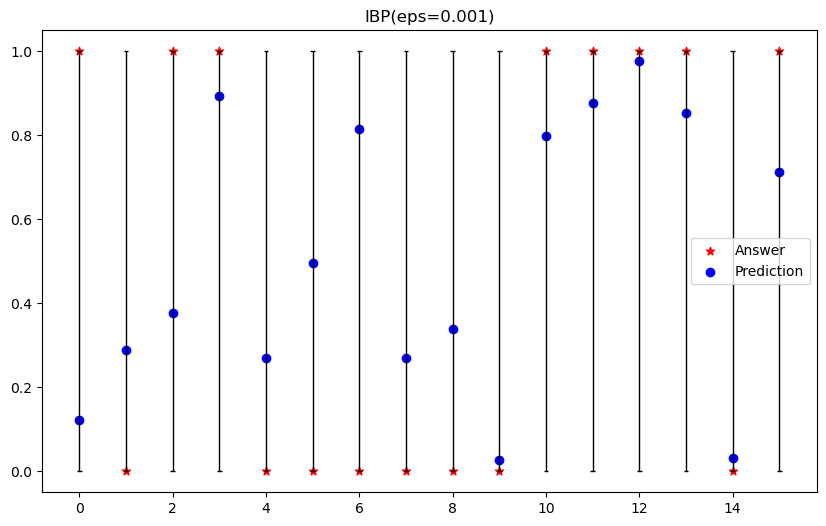


Bounding method: IBP+backward (CROWN-IBP)
0:   -0.168 <= f_0(x_0+eps) <=    1.005 (*)
1:   -0.105 <= f_1(x_0+eps) <=    1.050 
2:   -0.119 <= f_2(x_0+eps) <=    1.051 (*)
3:    0.011 <= f_3(x_0+eps) <=    1.205 (*)
4:   -0.125 <= f_4(x_0+eps) <=    1.034 
5:   -0.091 <= f_5(x_0+eps) <=    1.071 
6:   -0.019 <= f_6(x_0+eps) <=    1.143 
7:   -0.125 <= f_7(x_0+eps) <=    1.047 
8:   -0.103 <= f_8(x_0+eps) <=    1.049 
9:   -0.230 <= f_9(x_0+eps) <=    0.952 
10:   -0.023 <= f_10(x_0+eps) <=    1.141 (*)
11:    0.009 <= f_11(x_0+eps) <=    1.175 (*)
12:    0.099 <= f_12(x_0+eps) <=    1.350 (*)
13:   -0.020 <= f_13(x_0+eps) <=    1.171 (*)
14:   -0.216 <= f_14(x_0+eps) <=    0.955 
15:   -0.021 <= f_15(x_0+eps) <=    1.130 (*)


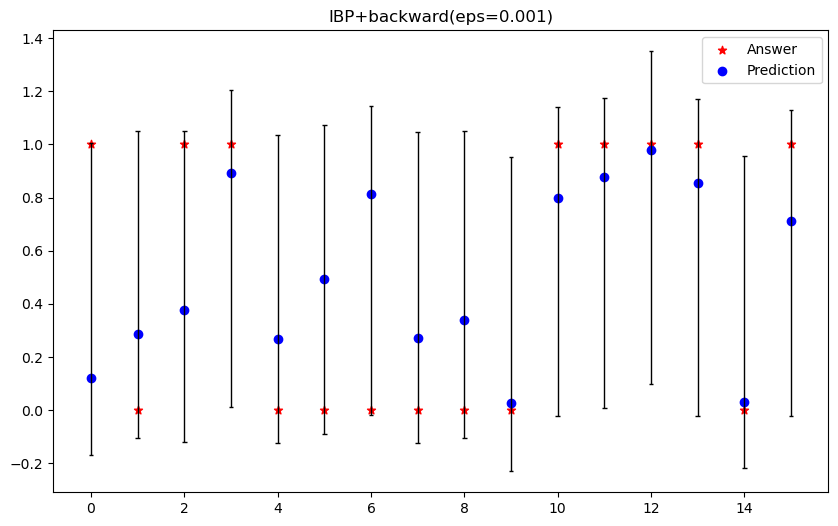


Bounding method: backward (CROWN)
0:    0.081 <= f_0(x_0+eps) <=    0.169 (*)
1:    0.217 <= f_1(x_0+eps) <=    0.374 
2:    0.297 <= f_2(x_0+eps) <=    0.466 (*)
3:    0.861 <= f_3(x_0+eps) <=    0.920 (*)
4:    0.187 <= f_4(x_0+eps) <=    0.357 
5:    0.399 <= f_5(x_0+eps) <=    0.585 
6:    0.766 <= f_6(x_0+eps) <=    0.860 
7:    0.202 <= f_7(x_0+eps) <=    0.360 
8:    0.263 <= f_8(x_0+eps) <=    0.421 
9:    0.018 <= f_9(x_0+eps) <=    0.041 
10:    0.735 <= f_10(x_0+eps) <=    0.847 (*)
11:    0.834 <= f_11(x_0+eps) <=    0.911 (*)
12:    0.972 <= f_12(x_0+eps) <=    0.982 (*)
13:    0.806 <= f_13(x_0+eps) <=    0.889 (*)
14:    0.020 <= f_14(x_0+eps) <=    0.046 
15:    0.646 <= f_15(x_0+eps) <=    0.779 (*)


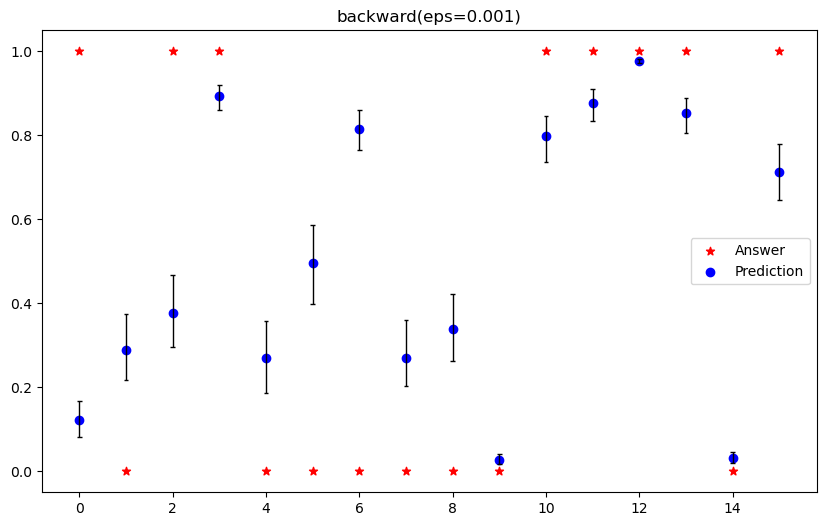

In [27]:
#
# Lirpa를 적용하고 그래프로 그 결과를 보여주는 프로그램
#

eps = 0.001
norm = float("inf")
ptb = PerturbationLpNorm(norm = norm, eps = eps)
test_X_1 = BoundedTensor(test_X_1, ptb)

pred = lirpa_model(test_X_1)
#label = torch.argmax(pred, dim=1).cpu().detach().numpy()

# print(test_X_1)
# print(test_Y_1)
print('Answer: ', test_Y_1)

print('Prediction: ', pred)


for method in [
    'IBP', 'IBP+backward (CROWN-IBP)', 'backward (CROWN)'   # ,
        # 'CROWN-Optimized (alpha-CROWN)'
    ]:
    print('Bounding method:', method)
    if 'Optimized' in method:
        lirpa_model.set_bound_opts({'optimize_bound_args': {'iteration': 20, 'lr_alpha': 0.1}})
    lb, ub = lirpa_model.compute_bounds(x=(test_X_1,), method=method.split()[0])

    for j in range(16):
        indicator = '(*)' if test_Y_1[0][j] >= 1.0 else ''
        print('{j}: {l:8.3f} <= f_{j}(x_0+eps) <= {u:8.3f} {ind}'.format(
                j=j, l=lb[0][j].item(), u=ub[0][j].item(), ind=indicator))

    xaxis = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

    plt.figure(figsize=(10,6))

    # answer와 prediction값 표시
    plt.scatter(xaxis, test_Y_1.tolist(), color='red', marker='*', label='Answer')
    plt.scatter(xaxis, pred.tolist(), color='blue', label='Prediction')
    
    # lb값과 up값 표시
    # plt.scatter(xaxis, lb[0].tolist(), color='red', marker='lb', label='Lower Bound')
    # plt.scatter(xaxis, ub[0].tolist(), color='green', marker='ub', label='Upper Bound')

    lb_list = lb[0].tolist()
    ub_list = ub[0].tolist()
    
    for j in range(16):
        plt.vlines(x=j, ymin=lb_list[j], ymax=ub_list[j], color='black', linewidth=1)
        plt.hlines(y=lb_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)
        plt.hlines(y=ub_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)

    # plt.xlabel('X-axis')
    # plt.ylabel('Y-axis')
    plt.title(method.split()[0] + "(eps=" + str(eps) + ")")
    plt.legend()
    # plt.grid(True)

    plt.show()

    print()

In [16]:
#  [잘못된 알고리즘] 나중에 지울 예정임
# 두 개의 리스트(lb_bounds와 ub_bounds)를 받아 처리하는 함수
#
def process_bounds(lb_bounds, ub_bounds):
    # 결과를 저장할 리스트
    result = []

    # 각 lower bound에 대해 나머지 8개의 upper bound와 비교
    for i in range(16):
        count = 0
        # 나머지 8개의 upper bound와 비교
        for j in range(16):
            if j == i:
                continue  # 자기 자신은 비교에서 제외
            if lb_bounds[i] > ub_bounds[j]:
                count += 1
        # 나머지 중 8개보다 크면 1, 아니면 0
        if count >= 8:
            result.append(1)
        else:
            result.append(0)

    # 선택된 안테나가 8개를 넘어가면 ... !!
    
    # lower bound로 정렬, 8번째로 큰 
    # uppler bound로 정렬, 8번째로 작은
    
    return result

# 16개의 lower bound와 upper bound 리스트 입력 (예시)
# lb_bounds = [5, 3, 7, 4, 6, 2, 8, 9, 1, 10, 11, 0, 12, 13, 14, 15]
# ub_bounds = [10, 8, 12, 9, 11, 7, 13, 14, 6, 15, 16, 5, 17, 18, 19, 20]

# 결과 출력
# result = process_bounds(lb_bounds, ub_bounds)
# print(result)


# 결과 출력
# result = process_bounds(bounds)
# print(result)

def compare_lists(list1, list2, verbose):
    # 두 리스트의 길이가 다르면 거짓을 반환
    if len(list1) != len(list2):
        return False
    
    # 동일한 원소의 개수를 셈
    match_count = 0
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            match_count += 1
    
    # 필요한 최소 일치 개수 계산
    required_matches = len(list1) / 2     # 8개 매치

    comp_result = match_count >= int(required_matches)
    
    # 동일한 원소의 비율이 조건을 충족하면 참, 아니면 거짓
    if verbose:
        print('match_count: ', match_count, '     ', 'required_matches: ', required_matches)
            
    return comp_result

In [17]:
def adjust(num):
    return float("{:8.3f}".format(num))

In [18]:
print(adjust(0.203012615442276))
print(adjust(0.20301222801208496))

0.203
0.203


In [31]:
# 
# Lirpa가 분석한 lower bounds 16개와 upper bounds 16개에서 Top 8개를 선택하고, 
# 본디 뉴럴넷의 결과와 같으면 True, 다르면 False를 리턴하는 프로그램
#
# lower bounds로 정렬했을 때 8번째 원소의 lower bound가
# upper bounds로 정렬했을 때 9번째 원소의 upper bound보다 크면
# Top 8개를 찾는 알고리즘
#

def process_and_compare(lb_bounds, ub_bounds, answer_list_float, max_diff, verbose):
    # 상위 8개의 인덱스를 찾기 
    top_k_indices = np.argsort(answer_list_float)[-8:] 

    # 모든 값을 0으로 설정 
    answer_list = np.zeros_like(answer_list_float) 

    # 상위 8개의 인덱스에 해당하는 값만 1로 설정 
    answer_list[top_k_indices] = 1
    
    # intervals = [( adjust(lb_bounds[i]), adjust(ub_bounds[i]), i) for i in range(len(lb_bounds))]
    intervals = [( lb_bounds[i], ub_bounds[i], i) for i in range(len(lb_bounds))]

    # lower bound <= upper bound 검사 
    for i in range (len(lb_bounds)):
        if intervals[i][0] > intervals[i][1]:
            if verbose:
                print ("False: lower bound > upper bound", intervals[i][0], ">", intervals[i][1])
            return False

    # return True  # just to take a look at the problem of  lower bound <= upper bound!
    
    if verbose:
        print (intervals)
    
    sorted_intervals_with_lb = sorted (intervals, key=lambda x: x[0], reverse=True)
    sorted_intervals_with_ub = sorted (intervals, key=lambda x: x[1], reverse=True)

    if verbose:
        print(sorted_intervals_with_lb)
        print(sorted_intervals_with_ub)
    
        print (sorted_intervals_with_lb[8-1][0])
        print (sorted_intervals_with_ub[9-1][1])
    
    if sorted_intervals_with_lb[8-1][0] > sorted_intervals_with_ub[9-1][1]:
        result = [0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0]
        for i in range(8):
            result[ sorted_intervals_with_lb[i][2] ] = 1


        if verbose:
            print('answer:', answer_list)
            print('result:', result)

        if len(result) != len(answer_list):
            if verbose:
                print ("False: len(answer_list) != 16: ")
            return False  # 첫번째 return False

        same = 0
        for i in range(16):
            if answer_list[i] == result[i] and answer_list[i] == 1:
                same = same + 1

        if 8 > max_diff and same >= 8-max_diff:
            return True
        else:
            if verbose:
                print( "False: answer_list != result", "under", max_diff);
            return False

    else:
        if verbose:
            print ("False: 8th lower bound <= 9th upper bound")
        return False # 세번째 return False

    

In [32]:
# 
# 4만개 데이터와 Epsilon 리스트를 조합해서 Lirpa로 분석하는 프로그램
#

turnOnDrawingGraphs = False
turnOnShowingBounds = False
turnOnShowingPrediction = False
turnOnShowingAnswers = False

noOfData = no_totalValData
# noOfData = 5

N_PRINT = 10000

method = 'backward (CROWN)'
print('Bounding method:', method)

# eps = 0.0001
norm = float("inf")
# ptb = PerturbationLpNorm(norm = norm, eps = eps)

print('noOfData: ', noOfData)

epsList = [  0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1 ] # 0.0000001,
epsListInDetailAll = [ 0.000001, 0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.0010, 0.01, 0.1, 1 ]
epsListInDetail = [ 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.0010 ]
epsListInDetail0_001 = [ 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010 ]
epsList1 = [ 0.00001, 0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.1, 1 ]
epsList2 = [ 0.00001, 0.0001, 0.001, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.1, 1 ]

percentList = []

for max_diff in [0]:
  print('max diff: ', max_diff)
    
  for eps in epsListInDetail0_001: # [ 0.00000000000000000001, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1 ]: 
    print('eps: ', eps)
    
    ptb = PerturbationLpNorm(norm = norm, eps = eps)

    bounds_data = []

    nTrue = 0
    nFalse = 0
    nOthers = 0
    percent = 0

    comp_result_list = []

    for i in range(0, noOfData):
      test_X_i = test_X[i:i+1].view(1,256)
      pred_i = all_preds_raw[i:i+1]

      test_X_i = BoundedTensor(test_X_i, ptb)
      # pred = lirpa_model(test_X_i)

    

      #if turnOnShowingAnswers:
      #    print('Answer: ', pred_i[0].tolist())

      # if turnOnShowingPrediction:
      #     print('Prediction: ', pred[0].tolist())

      lb, ub = lirpa_model.compute_bounds(x=(test_X_i,), method=method.split()[0])

      lb_list = lb[0].tolist()
      ub_list = ub[0].tolist()

      # for saving data to a csv file
      # bounds_data.append(lb_list)
      # bounds_data.append(ub_list)

      #if turnOnShowingBounds:
      #    for j in range(16):
      #        indicator = '(*)' if pred_i[0][j] >= 1.0 else ''
      #        print('{j}: {l:8.3f} <= f_{j}(x_0+eps) <= {u:8.3f} {ind}'.format(
      #                j=j, l=lb[0][j].item(), u=ub[0][j].item(), ind=indicator))

      ### Beginning of drawing graphs
      if turnOnDrawingGraphs: 
        xaxis = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    
        plt.figure(figsize=(10,6))
    
        # answer와 prediction값 표시
        plt.scatter(xaxis, pred_i.tolist(), color='red', marker='*', label='Answer')
        # plt.scatter(xaxis, pred.tolist(), color='blue', label='Prediction')
        
        # lb값과 up값 표시
        # plt.scatter(xaxis, lb[0].tolist(), color='red', marker='lb', label='Lower Bound')
        # plt.scatter(xaxis, ub[0].tolist(), color='green', marker='ub', label='Upper Bound')
    
        
        for j in range(16):
            plt.vlines(x=j, ymin=lb_list[j], ymax=ub_list[j], color='black', linewidth=1)
            plt.hlines(y=lb_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)
            plt.hlines(y=ub_list[j], xmin=j-0.05, xmax=j+0.05, color='black', linewidth=1)
    
        # plt.xlabel('X-axis')
        # plt.ylabel('Y-axis')
        plt.title(method.split()[0] + "(eps=" + str(eps) + ")")
        plt.legend()
        # plt.grid(True)
    
        plt.show()
        print()

      ### Ending of drawing graphs
      # answer_bounded_list = process_bounds(lb_list, ub_list)
      # comp_result = compare_lists(pred_i[0].tolist(), answer_bounded_list, turnOnShowingAnswers)

              
      count = 8
      #for k in range(16):
      #  if round(pred_i[0][k]) == 1:
      #     count = count + 1

      if count != 8:
        nOthers = nOthers + 1
      else:
        comp_result = process_and_compare(lb_list, ub_list, pred_i[0].tolist(), max_diff, turnOnShowingAnswers)

        if turnOnShowingAnswers:
          if comp_result==False:
              print('Input: ', i)
              print('Answer: ', pred_i[0].tolist())
              print('Comparison:', comp_result)
            
              for j in range(16):
                indicator = '(*)' if pred_i[0][j] >= 1.0 else ''
                print('{j}: {l:8.3f} <= f_{j}(x_0+eps) <= {u:8.3f} {ind}'.format(
                        j=j, l=lb[0][j].item(), u=ub[0][j].item(), ind=indicator))
            
          print()

        # comp_result_list.append(comp_result)
      
        if comp_result:
            nTrue = nTrue + 1
        else:
            nFalse = nFalse + 1

        percent = float(nTrue)/float(nTrue+nFalse)*100

      if (i+1) % N_PRINT == 0 and i != 0:
          print(str(i+1)+':', 'T='+str(nTrue), 'F='+str(nFalse), 'ratio=', str(percent), 'others=', nOthers, end=', ')

    ### Final results:
    print()
    # print('Final results: ', 'eps: '+str(eps), 'T='+str(nTrue), 'F='+str(nFalse), nFalse, 'ratio=', str(percent), 'others=', nOthers )

  # percentList.append(percent)

  ### Done for all epss    

# plt.bar(epsList, percentList)

# plt.title('EPS vs. Percent')
# plt.xlabel('eps')
# plt.ylabel('(%)')

# plt.show()

Bounding method: backward (CROWN)
noOfData:  40000
max diff:  0
eps:  0.001
10000: T=4608 F=5392 ratio= 46.08 others= 0, 20000: T=9055 F=10945 ratio= 45.275 others= 0, 30000: T=13605 F=16395 ratio= 45.35 others= 0, 40000: T=18079 F=21921 ratio= 45.197500000000005 others= 0, 
eps:  0.002
10000: T=1937 F=8063 ratio= 19.37 others= 0, 20000: T=3730 F=16270 ratio= 18.65 others= 0, 30000: T=5562 F=24438 ratio= 18.54 others= 0, 40000: T=7398 F=32602 ratio= 18.495 others= 0, 
eps:  0.003
10000: T=744 F=9256 ratio= 7.4399999999999995 others= 0, 20000: T=1390 F=18610 ratio= 6.950000000000001 others= 0, 30000: T=2031 F=27969 ratio= 6.77 others= 0, 40000: T=2726 F=37274 ratio= 6.815 others= 0, 
eps:  0.004
10000: T=251 F=9749 ratio= 2.5100000000000002 others= 0, 20000: T=468 F=19532 ratio= 2.34 others= 0, 30000: T=696 F=29304 ratio= 2.32 others= 0, 40000: T=944 F=39056 ratio= 2.36 others= 0, 
eps:  0.005
10000: T=80 F=9920 ratio= 0.8 others= 0, 20000: T=134 F=19866 ratio= 0.67 others= 0, 30000: T=

In [39]:
#
# 앞서 Lirpa에서 rubust하지 않다고(False) 분류한 케이스에 perturbation을 가하는 프로그램
#

import random

count = 0;

for i in range(0, noOfData):    
    test_X_i = test_X[i:i+1].view(1,256)
    pred_i = all_preds_raw[i:i+1]

    if comp_result_list[i]:
        continue
    else:
        test_X_i_eps = []
        
        for j in range(0, 256):
            delta = random.uniform(0,eps)
            if test_X_i[0][j] >= 0:
                test_X_i_eps.append( test_X_i[0][j] + eps )
            else:
                test_X_i_eps.append( test_X_i[0][j] - eps )

        outputs1 = wirelessModel(test_X_i)    # 원래 입력
        outputs2 = wirelessModel(torch.tensor([test_X_i_eps]))   # eps perturbation 입력

        o1 = outputs1.tolist()
        o2 = outputs2.tolist()
        
        indexed_outputs1 = [( i, o1[0][i] ) for i in range(0,16)]
        indexed_outputs2 = [( i, o2[0][i] ) for i in range(0,16)]

        sorted_indexed_outputs1 = sorted (indexed_outputs1, key=lambda x: x[1], reverse=True)
        sorted_indexed_outputs2 = sorted (indexed_outputs2, key=lambda x: x[1], reverse=True)

        is1 = sorted( [ sorted_indexed_outputs1[:8][i][0] for i in range(0,8)] )
        is2 = sorted( [ sorted_indexed_outputs2[:8][i][0] for i in range(0,8)] )

        if is1 != is2:
            print(i, ": ", is1, " != ", is2)
            count = count + 1

print(count, " out of ", noOfData)

1492 :  [0, 5, 7, 8, 9, 11, 12, 13]  !=  [0, 1, 5, 7, 8, 11, 12, 13]
3065 :  [0, 2, 4, 6, 7, 9, 10, 13]  !=  [0, 2, 4, 6, 7, 9, 12, 13]
4693 :  [0, 1, 5, 6, 9, 11, 12, 14]  !=  [0, 1, 2, 5, 6, 11, 12, 14]
5510 :  [1, 5, 6, 8, 9, 11, 12, 13]  !=  [1, 4, 5, 6, 9, 11, 12, 13]
8149 :  [0, 1, 5, 6, 8, 9, 10, 14]  !=  [0, 1, 2, 5, 6, 8, 9, 10]
9170 :  [1, 3, 7, 8, 11, 12, 14, 15]  !=  [1, 3, 6, 7, 8, 12, 14, 15]
10447 :  [2, 3, 4, 6, 9, 11, 13, 14]  !=  [1, 2, 3, 4, 6, 9, 11, 14]
10980 :  [2, 3, 4, 6, 7, 8, 11, 14]  !=  [0, 3, 4, 6, 7, 8, 11, 14]
13783 :  [5, 6, 7, 8, 11, 12, 14, 15]  !=  [2, 5, 6, 7, 8, 11, 14, 15]
16985 :  [1, 2, 5, 8, 9, 10, 14, 15]  !=  [1, 2, 5, 6, 8, 9, 14, 15]
17741 :  [0, 1, 3, 7, 10, 11, 12, 14]  !=  [0, 1, 2, 3, 7, 10, 12, 14]
24228 :  [2, 5, 6, 8, 9, 13, 14, 15]  !=  [1, 2, 5, 6, 8, 13, 14, 15]
25609 :  [1, 4, 5, 7, 9, 11, 12, 15]  !=  [4, 5, 7, 9, 11, 12, 14, 15]
27196 :  [0, 3, 4, 5, 6, 11, 14, 15]  !=  [0, 2, 3, 4, 6, 11, 14, 15]
27228 :  [0, 5, 6, 7, 8, 9, 13,

In [124]:
import csv

with open("analyzed_bounds.csv", 'w', newline='\n') as file:
    writer = csv.writer(file)
    writer.writerows(bounds_data)


###
read_flag = False

if read_flag:
    bounds_data = []
    
    # CSV 파일에서 읽기
    with open('analyzed_bounds.csv', 'r') as file:
        reader = csv.reader(file)
        bounds_data = [row for row in reader]  # 파일에서 읽은 데이터를 리스트의 리스트로 변환
    
    # 결과 출력
    print(bounds_data)